# Fractional BLSN Depth Estimation Algorithm

Author: Nicole Loeb<br>
Updated 22 January 2021

The following script includes the function to perform the fractional blowing snow depth estimation algorithm outlined in *Loeb and Kennedy (2022)* (DOI: 10.1029/2022JD037590). In this multi-instrument algorithm, the depth of the plume is estimated based on ceilometer, MPL and HSRL backscatter coefficient; MPL and HSRL linear depolarization ratio (LDR); and color ratio., combined with the depth estimation from the 5-min+MET algorithm. First, all observations are averaged to a common grid (default is 5-min temporally and 30 m vertically). The vertical grid spacing of 30 m was selected because it is the resolution of the coarsest dataset (KAZR). 

### Backscatter Coefficient Algorithms
An adapted version of the five-minute algorithm was applied to attenuated backscatter coefficients from the MPL and HSRL. It was also applied to 30 m averaged ceilometer profiles. The clear sky threshold was calculated for backscatter coefficient for each instrument using the same methodology as for the ceilometer. The algorithm then was applied as in *Gossart et al. (2017)*, shown by the following flowchart. Analysis of the 30 m averaged profiles begins at bin 2 (30-60 m) for the ceilometer, bin 5 (120-150 m) for the MPL, and bin 8 (210-240 m) for the HSRL. These algorithms are referred to as 30 m CEIL, MPL BS, and HSRL BS.
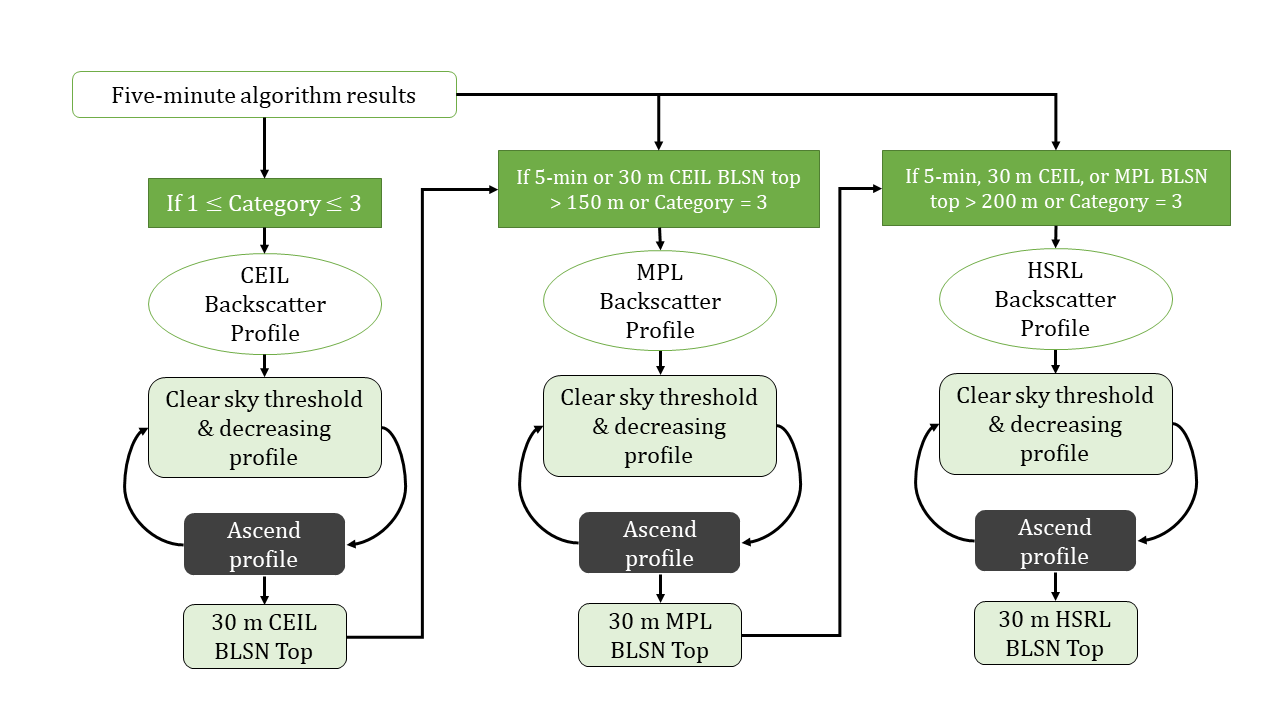
### Linear Depolarization Ratio Algorithms
Because BLSN particles tend to be more spherical than falling ice crystals, LDR can be used to help distinguish between the two habits *(Sassen 1991, 1977)*. Analysis begins by checking that the instrument’s backscatter coefficient is above the clear sky threshold for the lowest usable bin to ensure particles are present, and if the LDR in said bin is less than the upper level average. The upper level used for this analysis is 1200-1440 m. If both criteria are met, the algorithm ascends the profile and checks that the LDR in each bin remains lower from the mean of the layer above it by at least 0.01. Appropriate averaging layer depth for each instrument was determined through manual inspection of the data. A layer of 210 m and 390 m was used for the HSRL and MPL, respectively. Next, it checks that the instrument’s backscatter coefficient remains above the clear sky threshold. A 210 m layer was used to assess whether the profile is decreasing or increasing with height, rather than using a single bin, because the LDR tends to yield noisy profiles. The top of the layer was denoted as the bin in which either the backscatter falls below the clear sky threshold, or where the difference between the bin’s LDR and that of the layer above falls below 0.01. These algorithms are referred to as the MPL LDR and HSRL LDR, and are described in the following flowchart.
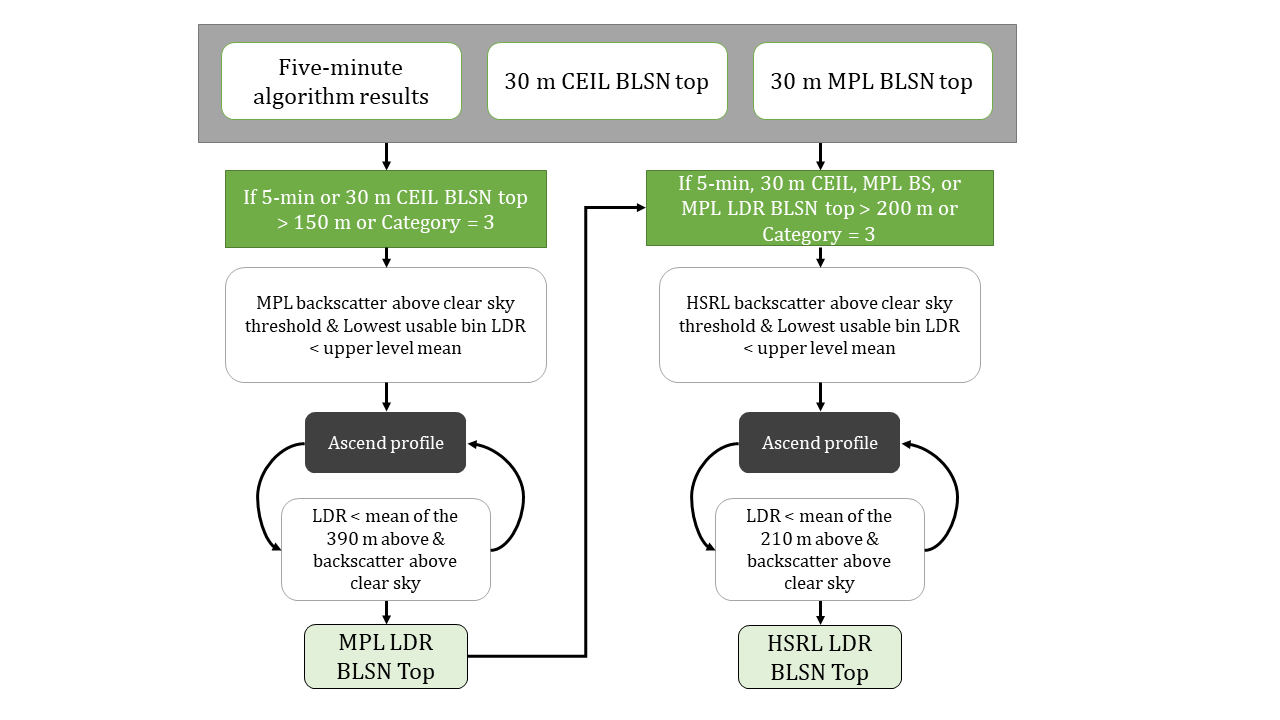
### Color Ratio Algorithm
The color ratio (CR) is a derived quantity that acts as a proxy for particle size, and is calculated as<br> $CR = β_{radar}/β_{lidar}$<br>
where $β_{radar}$ and $β_{lidar}$ represent the attenuated backscatter coefficients derived from a radar and lidar, respectively *(Bourdages et al. 2009)*. As BLSN particles tend to be smaller than that of falling snow *(Gordon and Taylor 2009)*, CR may be able to help distinguish the two populations of particles. Smaller particles yield a lower CR, typically in the range of $10^{-8} - 10^{-5}$ for boundary layer ice crystals *(Bourdages et al. 2009)*. In this study, CR was calculated using KAZR reflectivity factor and HSRL backscatter coefficient. Radar attenuated backscatter coefficient is derived from the linear equivalent radar reflectivity factor, Ze, based on the analysis presented in Intrieri et al. (1993);<br>
$β_{radar}=Z_eK^2(π^4)/(4λ)^4$<br>
where $λ$ represents the radar wavelength (8.6 mm), and $K^2$ is the dielectric constant. The value of $K^2$ used for ice is 0.176 *(Rauber and Nesbitt 2018)*. <br>
The CR BLSN depth detection algorithm is outlined in the following flowchart. Profile analysis begins by checking if the color ratio in the lowest usable bin (bin 10, 300-330 m) is greater than 10-8 to suggest the presence of low-level particles, the lower end of the CR range given for ice in the boundary layer by *Bourdages et al. (2009)*. It also verifies that the CR in the lowest usable bin is less than the average of the 300 m above it, as a generally increasing trend would be expected with height. If these two criteria are met, the algorithm ascends the profile, checking that the CR in each bin is less than the average of the two bins directly above, and that it does not exceed 10-5, suggesting the majority of the particles in the bin are larger than expected for BLSN *(Bourdages et al. 2009)*. This algorithm is referred to as the CR algorithm.
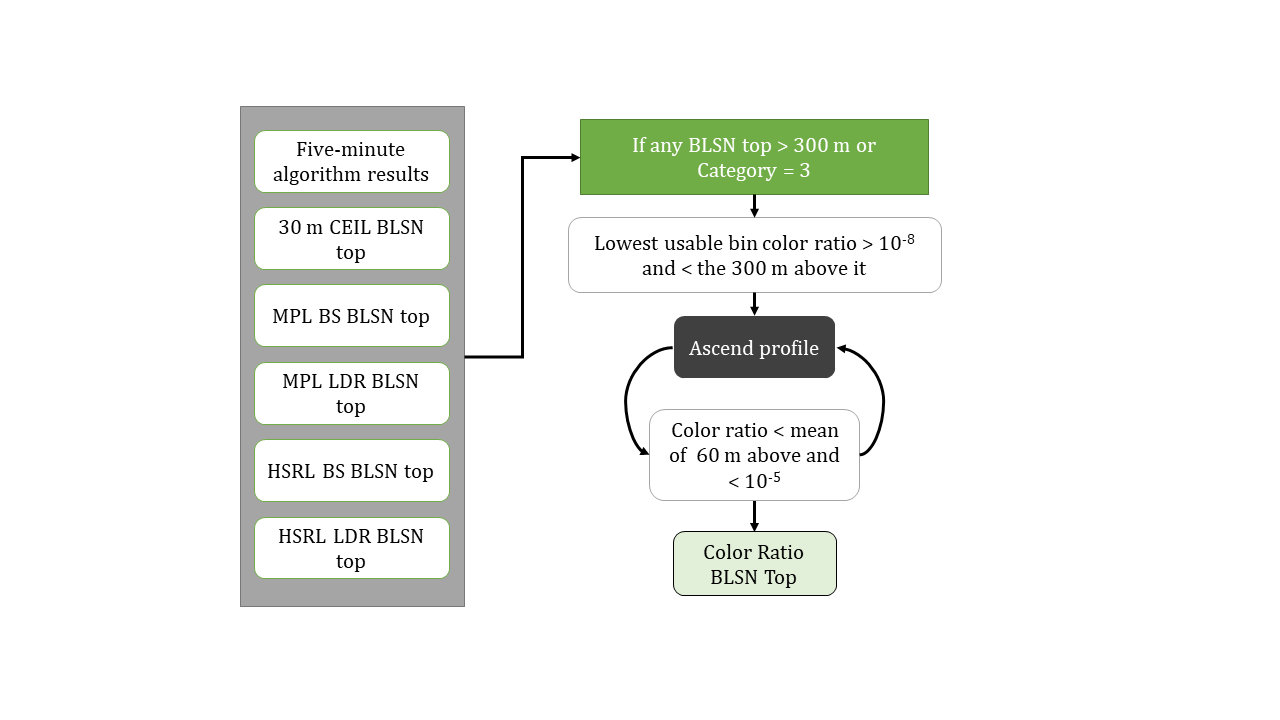<br>
### Criteria for Validity
Each algorithm is valid if the following criteria are met:<br>
<table>
    <thead>
        <tr><th>Algorithm</th><th>Criteria for Validity</th></tr>
    </thead>
    <tbody>
        <tr><td>5-min+MET</td><td>5-min + MET algorithm Category = 1-3</td></tr>
        <tr><td>30 m CEIL</td><td>5-min + MET algorithm Category = 1-3</td></tr>
        <tr><td>MPL BS</td><td>(Depth of 5-min+MET or 30 m CEIL algorithm at least 100 m) or (5-min+MET Category = 3)</td></tr>
        <tr><td>MPL LDR</td><td>(Depth of 5-min+MET or 30 m CEIL algorithm at least 100 m) or (5-min+MET Category = 3)</td></tr>
        <tr><td>HSRL BS</td><td>(Depth of 5-min+MET, 30 m CEIL, MPL BS, or MPL LDR algorithm at least 200 m) or (5-min+MET Category = 3)</td></tr>
        <tr><td>HSRL LDR</td><td>(Depth of 5-min+MET, 30 m CEIL, MPL BS, or MPL LDR algorithm at least 200 m) or (5-min+MET Category = 3)</td></tr>
        <tr><td>Color Ratio</td><td>(Depth of 5-min+MET, 30 m CEIL, MPL BS, MPL LDR, HSRL BS, or HSRL LDR algorithm at least 200 m) or (5-min+MET Category = 3)</td></tr>
    </tbody>
</table>

### Estimation of Plume Depth
The results of each algorithm were converted to binary; each bin received a value of one if it met the criteria for BLSN based on that algorithm and a zero if it did not. The total number of algorithms that designated the bin as BLSN was then divided by the number of algorithms that were valid to assess in said bin (validity based on criteria in table above). The result is an array in which each bin’s value is a fraction representing the agreement of the valid algorithms. This can be interpreted as relative certainty as to whether BLSN is occurring within the cell. To estimate the BLSN depth, the altitude at which the fraction falls below 0.5 for each period of BLSN was determined. To reduce unrealistic increases or decreases in BLSN depth, a running mean was applied using a window of five profiles (25 minutes). This reduces abrupt changes in BLSN depth that are physically unlikely.

### Data Description
<table>
    <thead>
        <tr><th>Instrument</th><th>Valid Heights</th><th>Temporal Resolution [s]</th><th>Vertical Resolution [m]</th><th>DOI</th></tr>
    </thead>
    <tbody>
        <tr><td>Ceilometer</td><td>10-7700</td><td>16</td><td>10</td><td>10.5439/1181954</td><tr>
        <tr><td>HSRL</td><td>50-30000</td><td>0.5</td><td>7.5</td><td>10.5439/1025200*</td><tr>
        <tr><td>MPL</td><td>100-20000</td><td>10</td><td>15</td><td>10.5439/1468777</td><tr>
        <tr><td>KAZR</td><td>200-20000</td><td>2</td><td>30</td><td>10.5439/1025214</td><tr>
    </tbody>
</table>
* Unaveraged HSRL observations retrieved from the University of Wisconsin-Madison Lidar Group Archive (http://hsrl.ssec.wisc.edu/)

In [ ]:
# import required modules
import xarray as xr
import numpy as np
import os
import pandas as pd
from os import listdir
from os.path import isfile, join
from datetime import datetime, timedelta
import math as m

In [ ]:
def fractionalBLSN(ceil_path,kazr_path,mpl_path,hsrl_path,skyrad_path,detection_output,
                   ceil_clr_file,mpl_clr_file,hsrl_clr_file,mpl_calibration,
                   h_bins = np.arange(0,2100,30), rad_thres = 20, dates = None,
                   radar_wavelength = 0.0085655, avg_period = 5, smooth_num = 5):
    """
    This function performs the fractional BLSN depth estimation algorithm
    outlined in Loeb and Kennedy (in prep) based on observations from the
    ceilometer, micropulse lidar, high spectral resolution lidar, and Ka-
    Band ARM Zenith Radar. DOI will be added here once available. 
    
    This script is written based on the DOE ARM datasets, and may need alterations
    when used elsewhere.
    
        Modules:
            import xarray as xr
            import numpy as np
            import os
            import pandas as pd
            from os import listdir
            from os.path import isfile, join
            from datetime import datetime, timedelta
            import math as m
    
        Inputs:
            ceil_path = string containing path to directory of ceilometer data files
            kazr_path = string containing path to directory of KAZR data files
            mpl_path = string containing path to directory of MPL data files
            hsrl_path = string containing path to directory of HSRL data files
            skyrad_path = string containing path to directory of SKYRAD60s data files
            detection_output = string containing path to csv file of output from the
                               5-min+MET algorithm
            ceil_clr_file = string containing path to csv containing ceilometer clear
                            sky profile
            mpl_clr_file = string containing path to csv containing MPL clear
                           sky profile
            hsrl_clr_file = string containing path to csv containing HSRL clear
                            sky profile
            mpl_calibration = string containing path to csv containing MPL
                              calibration profiles
    
        Other Input Parameters:
            h_bins: array of bins to average altitude over [in meters]
                    (default = np.arange(0,2100,30)) 
            rad_thres: radiation threshold for day/night for MPL calibration
                       in W/m^2 (default = 20)
            dates: list of dates to analyze (default = None)
                   if None - all dates in ceilometer data folder
                   if a subset - list of strings in the form of ['yyyymmdd']
                                 ex. ['20160612','20160430']
            radar_wavelength: wavelength of the radar (KAZR) in meters for
                              calculation of color ratio
                              (default = 0.0085655)
            avg_period: averaging period in minutes (default = 5)
                        * must match the BLSN detection input file 
                          averaging period
            smooth_num: number of observation periods to apply a running mean
                        to for the final BLSN top - must be an odd integer >= 1
                        (default = 5)
            
        Output:
            Pandas dataframe containing the following: 
            col 0: 'datetime' - time of the start of averaging period in the
                    format ('YYYY-MM-DD hh:mm:ss') 
            col 1: 'category' - category of detected BLSN [0 = no BLSN detected, 
                    1 = clear sky BLSN, 2 = cloud/precipitation with BLSN, 
                    3 = intense mixed event, 4 = fog]
            col 2: 'ceil_blsn_top' - altitude of top of BLSN plume based on 
                    5-min + MET algorithm [m]
            col 3: 'smoothed_blsn_top' - altitude of top of BLSN plume based on
                    fractional BLSN depth algorithm [m]
            col 4: '10m_windspeed' - 10 m wind speed from MET [m/s]
            col 5: '10m_winddir' - 10 m wind direction from MET [degrees]
            col 6: '2m_visibility' - 2 m visibility from MET [m]
            col 7: '2m_temperature' - 2 m temperature from MET [degC]
            col 8: 'ceil_30m' - altitude of top of BLSN plume based on 30 m CEIL
            col 9: 'mpl_bs' - altitude of top of BLSN plume based on MPL BS
            col 10: 'mpl_ldr' - altitude of top of BLSN plume based on MPL LDR
            col 11: 'hsrl_bs' - altitude of top of BLSN plume based on HSRL BS
            col 12: 'hsrl_ldr' - altitude of top of BLSN plume based on HSRL LDR
            col 13: 'cr' - altitude of top of BLSN plume based on Color Ratio
            col 14: 'valid_criteria' - number of algorithms whose criteria are
                    met for each time period
            
            missing value code = -99999999.9
    """
    # strings of integers that are the names of the columns in clear sky csvs
    names = [str(x) for x in range(len(h_bins))]
    
    # import profiles of MPL calibration constant profiles
    mpl_cal_const = pd.read_csv(mpl_calibration)
    
    # import MPL clear sky profile
    mpl_clr = pd.read_csv(mpl_clr_file,
                          header = None,names=names)
    
    # import HSRL clear sky profile
    hsrl_clr = pd.read_csv(hsrl_clr_file,
                          header = None,names=names)
    
    # import CEIL clear sky profile
    ceil_clr_raw = pd.read_csv(ceil_clr_file, header=None)
    ceil_clr_raw = np.array(ceil_clr_raw)[0]
    
    # average CEIL clear sky profile to 30m chunks
    ceil_clr = np.empty(len(h_bins))
    for ii in np.arange(3,len(h_bins),3):
        ceil_clr[int(ii/3 - 1)] = np.nanmean(ceil_clr_raw[ii-3:ii])
    
    # make a sorted list of ceilometer data files
    ceil_files = [f for f in listdir(ceil_path) if isfile(join(ceil_path,f))]
    ceil_files = sorted(ceil_files)
    
    # make a list of KAZR data files
    kazr_files = [f for f in listdir(kazr_path) if isfile(join(kazr_path,f))]
    
    # make a list of HSRL data files
    hsrl_files = [f for f in listdir(hsrl_path) if isfile(join(hsrl_path,f))]
    
    # make a list of MPL data files
    mpl_files = [f for f in listdir(mpl_path) if isfile(join(mpl_path,f))]
    
    # make a list of SKYRAD data files
    skyrad_files = [f for f in listdir(skyrad_path) if isfile(join(skyrad_path,f))]
    
    # import results of the 5-min+MET BLSN Detection Algorithm
    data_5min = pd.read_csv(detection_output)
    data_5min = data_5min.mask(data_5min == 99999999.9)
    data_5min['datetime'] = data_5min['datetime'].astype('datetime64')
    
    # initialize dataframe to contain results
    results = pd.DataFrame([], columns=['datetime','category','ceil_blsn_top',
                                        'smoothed_blsn_top','10m_windspeed',
                                        '10m_winddir','2m_visibility','2m_temperature',
                                        'ceil_30m','mpl_bs','mpl_ldr','hsrl_bs','hsrl_ldr',
                                        'cr','valid_criteria'])
    
    if dates == None:
        dates = [xx[-18:-10] for xx in ceil_files]
    else:
        pass

    for date in dates:
        try:    
            year = date[:4]
            month = date[4:6]
            day = date[6:]

            # generate times periods to average over            
            times = [np.datetime64(np.datetime64(str(year+'-'+month+'-'+day)+str(' 00:00:00'))) + 
                     x*np.timedelta64(avg_period,'m') for x in range(round(1440/avg_period)+1)]  
            
            # grab 5min alg results for the day
            date_data = data_5min[(data_5min['datetime'] >= times[0]) & 
                                  (data_5min['datetime'] <= times[-1])]
            date_data = date_data.reset_index()
        
            #..........................CEILOMETER OBSERVATIONS..........................
            # import CEIL data for date using xarray
            ceil_file = [s for s in ceil_files if date in s]
            data = xr.open_dataset(ceil_path+ceil_file[0], chunks=None)
        
            # define CEIL variables
            backscatter = np.array(data.backscatter)
            time = np.array(data.time)
            height = np.array(data.range)
            
            data.close() # close CEIL data file
        
            # initialize arrays to hold binned data
            chunks = np.empty((len(times),len(backscatter[1])), dtype=object)
            chunk_idx = np.empty((len(times)))
        
            # get indices for time averaging
            for ii in range(len(backscatter)):
                jj = 0
                try:
                    time_ii = np.datetime64(time[ii])
                    while time_ii > np.datetime64(times[jj]):
                        jj+=1
                except:
                    jj = len(times) - 1 
                chunk_idx[jj] = ii
        
            chunk_idx = [int(x) for x in chunk_idx]
        
            # average backscatter data over time axis
            profiles_ceil = np.empty((len(chunks),len(backscatter[1])))
            for ii in range(1,len(chunks)):
                profiles_ceil[ii] = np.nanmean(backscatter[chunk_idx[ii-1]:chunk_idx[ii]],axis=0)
        
            # transpose for easier averaging of altitude axis
            profiles_bs = np.transpose(profiles_ceil)
        
            #initialize arrays to contain final averaged backscatter data
            chunks = np.full(len(h_bins), 9999999.99, dtype=object)
            chunk_idx = np.full((len(h_bins)), 9999999.99)
            profiles_ceil = np.empty((len(h_bins),len(profiles_bs[1])))
        
            # get indices for altitude averaging
            for ii in range(len(height)):
                jj = 1
                try:
                    alt_ii = height[ii]
                    while alt_ii > h_bins[jj]:
                        jj+=1
                except:
                    jj = len(h_bins) - 1
                if ii < 1:
                    ii = 0
                chunk_idx[jj] = int(ii)
                    
            # average ceilometer backscatter data along altitude axis
            for ii in range(0,len(profiles_ceil)-1):
                profiles_ceil[ii] = np.mean(profiles_bs[int(chunk_idx[ii]):int(chunk_idx[ii+1])][:],axis=0)
            profiles_ceil = np.transpose(profiles_ceil)
    
            #.............................KAZR OBSERVATIONS............................
            # try loop because KAZR data is sometimes missing
            try:
                # Import KAZR data for date
                kazr_file = [s for s in kazr_files if date in s]
                data_kazr = xr.open_dataset(kazr_path + kazr_file[0],chunks=None)
                        
                # define KAZR variables        
                ref = np.array(data_kazr.reflectivity_copol)
                alt_kazr = np.array(data_kazr.range)
                time = np.array(data_kazr.time)
                
                data_kazr.close() # close KAZR data file
        
                # kazr_valid = 1 indicates KAZR data successfully read
                kazr_valid = 1
        
                # initialize arrays to hold binned KAZR data
                chunks = np.empty((len(times),len(ref)), dtype=object)
                chunk_idx = np.empty((len(times)))
        
                # get indices for time averaging
                for ii in range(len(ref)):
                    jj = 0
                    try:
                        time_ii = np.datetime64(time[ii])
                        while time_ii > np.datetime64(times[jj]):
                            jj+=1
                    except:
                        jj = len(times) - 1 
                    chunk_idx[jj] = ii
        
                chunk_idx = [int(x) for x in chunk_idx]
        
                # average KAZR reflectivity data along time axis
                profiles_kazr = np.empty((len(times),600))
                for ii in range(1,len(times)-1):
                    profiles_kazr[ii] = np.nanmean(ref[chunk_idx[ii]:chunk_idx[ii+1]],axis=0)
        
                for ii in range(len(times)):
                    for jj in range(0,4):
                        profiles_kazr[ii][jj] = np.nan
              
            # if KAZR data not available/invalid
            except:
                # save empty arrays so errors do not occur during algorithm
                profiles_kazr = np.empty((len(times),len(h_bins)))
                alt_kazr = h_bins
                
                # kazr_valid = 0 indicates KAZR data not available
                kazr_valid = 0
                    
            
            #.............................HSRL OBSERVATIONS............................
            # try loop because HSRL data is sometimes missing
            try:
        
                # Import HSRL data for date
                hsrl_file = [s for s in hsrl_files if date in s]
                data_hsrl = xr.open_dataset(hsrl_path + hsrl_file[0],chunks=None)
    
                # define HSRL variables
                backscatter = np.array(data_hsrl.beta_a_backscat)
                lin_depol = np.array(data_hsrl.linear_depol)
                time_h = np.array(data_hsrl.time)
                alt_hsrl = np.array(data_hsrl.altitude)
                
                data_hsrl.close() # close HSRL data file
                
                # hsrl_valid = 1 indicates HSRL data successfully read
                hsrl_valid = 1
                
                # initialize arrays to hold binned data
                chunks = np.empty((len(times),len(backscatter[1])), dtype=object)
                chunk_idx = np.empty((len(times)))
                
                # get indices for time averaging
                for ii in range(len(backscatter)):
                    jj = 0
                    try:
                        time_ii = np.datetime64(time_h[ii])
                        while time_ii > np.datetime64(times[jj]):
                            jj+=1
                    except:
                        jj = len(times) - 1 
                    chunk_idx[jj] = ii
                            
                # average HSRL data along time axis
                profiles_hsrl = np.empty((len(chunk_idx),len(backscatter[1])))
                profiles_hsrl_ldr = np.empty((len(chunk_idx),len(lin_depol[1])))
                for ii in range(1,len(chunk_idx)):
                    profiles_hsrl[ii] = np.nanmean(backscatter[int(chunk_idx[ii-1]):int(chunk_idx[ii])],axis=0)
                    profiles_hsrl_ldr[ii] = np.nanmean(lin_depol[int(chunk_idx[ii-1]):int(chunk_idx[ii])],axis=0)
        
                # transpose for easier averaging of altitude axis
                profiles_bs = np.transpose(profiles_hsrl)
                profiles_ld = np.transpose(profiles_hsrl_ldr)
        
                #initialize arrays to contain final averaged reflectivity data
                chunks = np.full(len(h_bins), 9999999.99, dtype=object)
                chunk_idx = np.full((len(h_bins)), 9999999.99)
                profiles_hsrl = np.empty((len(h_bins),len(profiles_bs[1])))
                profiles_hsrl_ldr = np.full((len(h_bins),len(profiles_ld[1])), 9999999.99)
        
                # get indices for altitude averaging
                for ii in range(len(alt_hsrl)):
                    jj = 1
                    try:
                        alt_ii = alt_hsrl[ii]
                        while alt_ii > h_bins[jj]:
                            jj+=1
                    except:
                        jj = len(h_bins) - 1
                    if ii < 1:
                        ii = 0
                    chunk_idx[jj] = int(ii)
        
                # average HSRL data along altitude axis
                for ii in range(len(profiles_hsrl)-1):
                    profiles_hsrl[ii] = np.mean(profiles_bs[int(chunk_idx[ii]):int(chunk_idx[ii+1])][:],axis=0)
                    profiles_hsrl_ldr[ii] = np.mean(profiles_ld[int(chunk_idx[ii]):int(chunk_idx[ii+1])][:],axis=0)
                profiles_bs = np.transpose(profiles_hsrl)
                profiles_hsrl_ldr = np.transpose(profiles_hsrl_ldr)
        
                # change backscatter units to match that of the ceilometer
                profiles_hsrl = [x * 10000 * 1000 for x in profiles_bs]
                profiles_hsrl = np.array(profiles_hsrl)
            
            # if HSRL data not available/invalid
            except:
                # save empty arrays so errors do not occur during algorithm
                profiles_hsrl = np.empty((len(times),len(h_bins)))
                profiles_hsrl_ldr = np.empty((len(times),len(h_bins)))
                alt_hsrl = h_bins
                
                # hsrl_invalid = 0 indicates HSRL data not available/invalid
                hsrl_valid = 0
        
            #..............................COLOUR RATIO.............................
            # if both KAZR and HSRL data are valid, calculate CR profile
            if kazr_valid + hsrl_valid == 2:
                # convert log KAZR reflectivity to linear
                ze = [10**(z/10) for z in profiles_kazr]
            
                # calculate radar backscattering coeffecient (eta) based on Eq. 6 from Intrieri et al. (1992)
                # K = 0.176 from radar meteorology textbook, 35 GHz = 8.5655 mm wavelength
                # 10**-18 is a unit conversion factor
                eta = [(z*10**-18 * 0.176 * (m.pi)**5)/ (radar_wavelength)**4 for z in ze]
                
                # calculate radar backscatter based on Eq. 8 from Intrieri et al. (1992)        
                radar_backscat = [n / (4*m.pi) for n in eta] 
                radar_backscat = np.array(radar_backscat)
                    
                # initialize array to hold calculated color ratio values
                profiles_cr = np.empty((len(times),len(h_bins)),dtype='float')
                for ii in range(len(profiles_cr)):
                    for jj in range(len(h_bins)):
                        try:
                            # calculate color ratio based on Eq. 10 from Intrieri et al. (1992)
                            profiles_cr[ii][jj] = float(radar_backscat[ii][jj])/float(profiles_bs[ii][jj])
                            
                        except:
                            # these 'if' statements cover some common issues I encountered
                            if profiles_bs[ii][jj] < 0.:
                                profiles_cr[ii][jj] = 99999999.9
                            elif radar_backscat[ii][jj] == np.nan:
                                profiles_cr[ii][jj] = 99999999.9
                            elif profiles_bs[ii][jj] == np.nan:
                                profiles_cr[ii][jj] = 99999999.9
                            elif np.isfinite(profiles_bs[ii][jj]) + np.isfinite(radar_backscat[ii][jj]) != 2:
                                profiles_cr[ii][jj] = 99999999.9
                            else:
                                print(f'other error {ii} {jj}')
            
            # if KAZR or HSRL data unavailable, an empty array is saved
            else:
                profiles_cr = np.full((len(times),len(h_bins)),99999999.9)
        
            #..............................MPL OBSERVATIONS............................
            # try loop because MPL data is sometimes missing                
            try:
                # import MPL data for date
                mpl_file = [s for s in mpl_files if date in s]
                data_mpl = xr.open_dataset(mpl_path + mpl_file[0],chunks=None)
                
                # define MPL variables
                backscatter = np.array(data_mpl.att_backscat)
                ldr = np.array(data_mpl.ldr)
                base_time = np.array(data_mpl.base_time)
                alt_mpl = np.array(data_mpl.range)
                alt_mpl = [int(x) for x in alt_mpl]
                
                # time in Silber's MPL dataset is weird, so we have a few extra steps here to make it the same format
                time_s = np.array(data_mpl.time).flatten()
                time_mpl = [np.datetime64('1970-01-01T00:00:00') + np.timedelta64(int(base_time[0]),'s') + np.timedelta64(int(x),'s') for x in time_s]            
                
                data_mpl.close() # close MPL data file
                
                # find indices for temporal averaging
                mpl_idx = np.zeros((len(times)))
                jj = 0
                for ii in range(len(backscatter)):
                    try:
                        time_ii = np.datetime64(time_mpl[ii])
                        while time_ii > np.datetime64(times[jj]):
                            jj+=1
                    except:
                        jj = len(times) - 1 
                    mpl_idx[jj] = ii
                mpl_idx = [int(x) for x in mpl_idx]
                
                # average MPL data over time axis
                profiles_mpl = np.empty((len(times),len(backscatter[1])))
                profiles_ldr = np.empty((len(times),len(ldr[1])))
                for ii in range(1,len(profiles_mpl)):
                    profiles_mpl[ii] = np.nanmean(backscatter[mpl_idx[ii-1]:mpl_idx[ii]],axis=0)
                    profiles_ldr[ii] = np.nanmean(ldr[mpl_idx[ii-1]:mpl_idx[ii]],axis=0)
                       
                # MPL backscatter from Silber's dataset is in photons/sec, so we need to convert to match CEIL
                
                # to convert, we need to know the incoming radiation to convert the units
                # to get this, we import SKYRAD60S data
                skyrad_file = [s for s in skyrad_files if date in s]
                   
                # if SKYRAD60S data is available
                try:
                    # import SKYRAD data
                    data_skyrad= xr.open_dataset(skyrad_path + skyrad_file[0],chunks=None)
                    
                    # define SKYRAD variables
                    short_direct = np.array(data_skyrad.short_direct_normal)
                    sr_time = np.array(data_skyrad.time)
                    
                    data_skyrad.close() # close SKYRAD data file
        
                    # get indices for temporal averaging
                    sr_idx = np.zeros((len(times)))
                    jj = 0
                    for ii in range(len(short_direct)):
                        try:
                            time_ii = np.datetime64(sr_time[ii])
                            while time_ii > np.datetime64(times[jj]):
                                jj+=1
                        except:
                            jj = len(times) - 1 
                        sr_idx[jj] = ii
                    sr_idx = [int(x) for x in sr_idx]
                    
                    # average radiation data over time axis
                    sw_dir = np.empty(len(times))
                    for ii in range(1,len(sw_dir)):
                        sw_dir[ii] = np.nanmean(short_direct[sr_idx[ii-1]:sr_idx[ii]])
    
                    # sun indicates whether the radiation threshold is met for MPL day/night calibration constant         
                    sun = np.zeros(len(times))
                    for ii in range(len(times)):
                        if sw_dir[ii] >= rad_thres:
                            sun[ii] = 1
                        else:
                            pass
                # if no data available, assume no sun (that's when data is missing sometimes)
                except: 
                    sun = np.zeros(len(times)) # no daytime
        
                # apply calibration constant to MPL backscatter based on day/night
                for ii in range(len(profiles_mpl)):
                    if sun[ii] == 1:
                        profiles_mpl[ii][:] = profiles_mpl[ii][:] / mpl_cal_const['C_day'][:len(profiles_mpl[ii])]
                    elif sun[ii] == 0:
                        profiles_mpl[ii][:] = profiles_mpl[ii][:] / mpl_cal_const['C_night'][:len(profiles_mpl[ii])]
        
                # transpose for easier averaging of altitude axis
                profiles_bs_mpl = np.transpose(profiles_mpl)
                profiles_ldr_mpl = np.transpose(profiles_ldr)
        
                #initialize arrays to contain final averaged MPL data
                chunks = np.full(len(h_bins), 9999999.99, dtype=object)
                chunk_idx = np.full((len(h_bins)), 9999999.99)
                profiles_mpl= np.full((len(h_bins),len(times)), 9999999.99)
                profiles_ldr= np.full((len(h_bins),len(times)), 9999999.99)
        
                # get indices for altitude averaging
                for ii in range(len(alt_mpl)):
                    jj = 1
                    try:
                        alt_ii = alt_mpl[ii]
                        while alt_ii > h_bins[jj]:
                            jj+=1
                    except:
                        jj = len(h_bins) - 1
                    if ii < 1:
                        ii = 0
                    chunk_idx[jj] = int(ii)
        
                # average reflectivity data along altitude axis
                for ii in range(len(profiles_mpl)-1):
                    profiles_mpl[ii] = np.nanmean(profiles_bs_mpl[int(chunk_idx[ii]):int(chunk_idx[ii+1])][:],axis=0)
                    profiles_ldr[ii] = np.nanmean(profiles_ldr_mpl[int(chunk_idx[ii]):int(chunk_idx[ii+1])][:],axis=0)
                profiles_mpl = np.transpose(profiles_mpl)
                profiles_ldr = np.transpose(profiles_ldr)
                
                # 
                profiles_mpl = [x*(10000*1000) for x in profiles_mpl]
        
            except:
                profiles_mpl = np.empty((len(times),len(h_bins)))
                alt_mpl = h_bins
    
            #...........................DEPTH ALGORITHMS.............................
            # initialize arrays to contain output from CEIL algorithm
            blsn = np.zeros((len(times),len(h_bins))) # number of algorithms designating each bin as BLSN
            blsn_ceil = np.full(len(times),99999999.9) # 30 m CEIL algorithm
            blsn_mpl = np.full(len(times),99999999.9) # MPL BS algorithm
            blsn_mpl_ldr = np.full(len(times),99999999.9) # MPL LDR algorithm
            blsn_hsrl = np.full(len(times),99999999.9) # HSRL algorithm
            blsn_hsrl_ldr = np.full(len(times),99999999.9) # HSRL LDR algorithm
            blsn_cr = np.full(len(times),99999999.9) # Colour ratio algorithm
            valid_crit = np.zeros(len(times)) # how many algorithms' criteria are met for each time period
            
            # Start of algorithm
            for ii in range(len(profiles_ceil)):
                # first, check if BLSN was detected by the 5-min+MET algorithm
                if 1 <= date_data['category'][ii] <= 3:
                    
                    valid_crit[ii] += 2 # for meeting 5-min+MET and 30 m CEIL criteria
                    
                    # add 1 to every bin below 5-min+MET BLSN depth
                    jj = 0
                    while h_bins[jj] <= date_data['detected_blsn_top'][ii]:
                        blsn[ii][jj] += 1
                        jj += 1
                        if jj >= len(h_bins):
                            break
        
                    # 30 m CEIL algorithm
                    crit1 = int(profiles_ceil[ii][1] > np.nanmean(profiles_ceil[ii][2:5])) # check for decreasing profile with height
                    crit2 = int(profiles_ceil[ii][1] >= ceil_clr[1]) # check that CEIL backscatter above clear sky threshold in lowest bin
                    if crit1 + crit2 == 2: # if all criteria are met, BLSN is detected
                        idx = 2 # start at 1 above lowest usable bin
                
                        # ascend the profile until bin where backscatter increases again or falls below clear sky threshold 
                        while profiles_ceil[ii][idx] > profiles_ceil[ii][idx+1]:
                            if profiles_ceil[ii][idx] < ceil_clr[idx]: 
                                break # end if backscatter falls below clear sky signal for said bin
                            else:
                                idx += 1
        
                        blsn_ceil[ii] = h_bins[idx]
                        
                        # add 1 to every bin below 30 m CEIL BLSN depth
                        for aa in range(idx + 1):
                            blsn[ii][aa] += 1
                            
                    else:                        
                        # if validity criteria not met, top is set to negative missing value code
                        blsn_ceil[ii] = -99999999.9
        
                    # check if MPL algorithms' criteria are met
                    if (date_data['detected_blsn_top'][ii] > 100) or (blsn_ceil[ii] > 100) or (date_data['category'][ii] == 3):
                        
                        valid_crit[ii] += 2 # for meeting MPL BS and MPL LDR validity criteria 
        
                        # MPL BS algorithm
                        crit1 = int(profiles_mpl[ii][4] > np.nanmean(profiles_mpl[ii][5:8])) # check for decreasing profile with height
                        crit2 = int(profiles_mpl[ii][4] >= float(mpl_clr['4'])) # check that lowest usable bin backscatter > clear sky
                        if crit1 + crit2 == 2: # if all criteria are met, BLSN is detected
                            idx= 5
                            # ascend the profile until bin where backscatter increases again or falls below clear threshold
                            while profiles_mpl[ii][idx] > np.nanmean(profiles_mpl[ii][idx+1:idx+3]):
                                if profiles_mpl[ii][idx] < float(mpl_clr[str(idx)]): 
                                    break # end if backscatter falls below clear sky signal for said bin
                                else:
                                    idx +=1 
                            
                            blsn_mpl[ii] = h_bins[idx]
                            
                            # add 1 to every bin below MPL BS BLSN depth
                            for aa in range(idx + 1):
                                blsn[ii][aa] += 1
        
                        # MPL LDR algorithm 
                        crit1 = int(profiles_mpl[ii][4] > float(mpl_clr['4'])) # check that lowest usable bin backscatter > clear sky
                        crit2 = int(profiles_ldr[ii][4] < np.nanmean(profiles_ldr[ii][40:48])) # check that LDR lower than upper level mean
                        if crit1 + crit2 == 2: # if all criteria are met, BLSN is detected
                            idx = 5 # start at lowest usable bin
                            
                            # ascend the profile until difference between LDR and 390 m above it > -0.01, or MPL BS falls below clear sky threshold
                            while float(profiles_ldr[ii][idx] - np.nanmean(profiles_ldr[ii][idx+1:idx+14])) <= -0.01:
                                if profiles_mpl[ii][idx] > float(mpl_clr[str(idx)]):
                                    idx += 1
                                else:
                                    break 
                                
                            blsn_mpl_ldr[ii] = h_bins[idx]
                            
                            # add 1 to every bin below MPL LDR BLSN depth
                            for aa in range(4,idx+ 1):
                                blsn[ii][aa] += 1
                    else:
                        # if validity criteria not met, top is set to negative missing value code
                        blsn_mpl_ldr[ii] = -99999999.9
                        blsn_mpl[ii] = -99999999.9
                                    
                    # check if HSRL algorithms' criteria are met
                    if (date_data['detected_blsn_top'][ii] > 200) or (blsn_ceil[ii] > 200) or (blsn_mpl[ii] > 200) or (blsn_mpl_ldr[ii] > 200) or (date_data['category'][ii] == 3):
                        
                        valid_crit[ii] += 2 # for meeting the HSRL BS and HSRL LDR validity criteria
        
                        # HSRL BS algorithm
                        crit1 = int(profiles_hsrl[ii][7] > np.nanmean(profiles_hsrl[ii][8:11])) # check for decreasing profile with height
                        crit2 = int(profiles_hsrl[ii][7] > float(hsrl_clr['7'])) # check that lowest usable bin backscatter > clear sky
                        if crit1 + crit2 == 2:
                            idx = 8 # start at lowest usable bin
                            # ascend the profile until bin where backscatter increases again or falls below clear sky threshold
                            while profiles_hsrl[ii][idx] > np.nanmean(profiles_hsrl[ii][idx+1:idx+3]):
                                if int(profiles_hsrl[ii][idx] < float(hsrl_clr[str(idx)])) == 1: 
                                    break
                                else:
                                    idx += 1
        
                            blsn_hsrl[ii] = h_bins[idx]
                            
                            # add 1 to every bin below HSRL BS BLSN depth
                            for aa in range(idx+ 1):
                                blsn[ii][aa] += 1
        
                        # HSRL LDR algorithm
                        crit1 = int(profiles_hsrl[ii][7] > float(hsrl_clr['7'])) # check that lowest usable bin backscatter > clear sky
                        crit2 = int(profiles_hsrl_ldr[ii][7] < np.nanmean(profiles_hsrl_ldr[ii][40:48])) # check that LDR lower than upper level mean
                        if crit1 + crit2 == 2:
                            idx = 8 # start at lowest usable bin
                            # ascend the profile until difference between LDR and 210 m above it < -0.01, or HSRL BS falls below clear sky threshold
                            while float(profiles_hsrl_ldr[ii][idx] - np.nanmean(profiles_hsrl_ldr[ii][idx+1:idx+8])) <= -0.01:
                                if profiles_hsrl[ii][idx] > float(hsrl_clr[str(idx)]):
                                    idx += 1
                                else:
                                    break 
        
                            blsn_hsrl_ldr[ii] = h_bins[idx]
                            
                            # add 1 to every bin below HSRL LDR BLSN depth
                            for aa in range(8,idx+ 1):
                                blsn[ii][aa] += 1
                    else:
                        # if validity criteria not met, top is set to negative missing value code
                        blsn_hsrl[ii] = -99999999.9                         
                        blsn_hsrl_ldr[ii] = -99999999.9
        
                    # Colour Ratio algorithm
                    if (date_data['detected_blsn_top'][ii] > 300) or (blsn_ceil[ii] > 300) or (blsn_mpl[ii] > 300) or (blsn_mpl_ldr[ii] > 300) or (blsn_hsrl[ii] > 300) or (blsn_hsrl_ldr[ii] > 300) or (date_data['category'][ii] == 3):
                
                        valid_crit[ii] += 1 # for meeting validity criteria of colour ratio algorithm
        
                        crit1 = int(10**(-5.) > profiles_cr[ii][10] > 10**(-8.)) # check that value is within valid values
                        crit2 = int(profiles_cr[ii][10] < np.nanmean(profiles_cr[ii][11:21])) # check that profile generally increases with height
                        if crit1 + crit2 == 2:
                            idx = 11 # start at lowest usable bin
                            
                            # ascend the profile until profile stops decreasing with height or goes above 10**(-5)
                            while profiles_cr[ii][idx] < np.nanmean(profiles_cr[ii][idx+1:idx+2]):
                                if profiles_cr[ii][idx] < 10**(-5.0):
                                    idx += 1
                                else:
                                    break
        
                            blsn_cr[ii] = h_bins[idx]
                            
                            # add 1 to every bin below Colour Ratio BLSN depth
                            for aa in range(11,idx+ 1):
                                blsn[ii][aa] += 1
                    else:
                        # if validity criteria not met, top is set to negative missing value code
                        blsn_cr[ii] = -99999999.9
                if ii >= len(date_data)-1:
                    break

            # calculate the fraction of valid algorithms designating the bin as BLSN
            blsn_frac = np.zeros_like(blsn)
            for ii in range(len(blsn)):
                blsn_frac[ii][:] = blsn[ii][:]/valid_crit[ii]

            # set the top of the fractional BLSN estimation as height at which the fraction falls below 0.5
            crit = np.zeros(len(blsn))
            for ii in range(len(blsn)):
                jj = 0
                while blsn_frac[ii][jj] >= 0.5:
                    jj += 1
                crit[ii] = h_bins[jj]

            # the top of the plume is smoothed to enhance continuity
            # a running mean of smooth_num number of elements are applied
            weights = np.repeat(1.0, smooth_num)/smooth_num
            opt_blsn = np.convolve(crit, weights)

            # add NaNs to the front and back of matrix to account for periods lost due to running mean
            # you lose (smooth_num-1)/2 observations at start/end of period
            opt_blsn = np.append(np.full(int((smooth_num-1)/2),np.nan), opt_blsn)
            opt_blsn = np.append(opt_blsn,np.full(int((smooth_num-1)/2),np.nan))
        
            #..........................APPEND RESULTS TO DATAFRAME...........................
            for ii in range(len(date_data)):
                chunk_results = {'datetime':times[ii],
                                 'category':date_data['category'][ii],
                                 'ceil_blsn_top':date_data['detected_blsn_top'][ii],
                                 'smoothed_blsn_top':opt_blsn[ii],
                                 '10m_windspeed':date_data['10m_windspeed'][ii],
                                 '10m_winddir':date_data['10m_winddir'][ii],
                                 '2m_visibility':date_data['2m_visibility'][ii],
                                 '2m_temperature':date_data['2m_temperature'][ii],
                                 'ceil_30m':blsn_ceil[ii],
                                 'mpl_bs':blsn_mpl[ii],
                                 'mpl_ldr':blsn_mpl_ldr[ii],
                                 'hsrl_bs':blsn_hsrl[ii],
                                 'hsrl_ldr':blsn_hsrl_ldr[ii],
                                 'cr':blsn_cr[ii],
                                 'valid_criteria':np.max(valid_crit[ii])}
                results = results.append(chunk_results,ignore_index=True)
            
        
            print(f'----------------------------done {date}----------------------------')

        except:
            print(f'--------------------------error on {date}--------------------------')

    return results


In [ ]:
""" Example 1: Run algorithm for 12 June 2016 with standard configuration
               and print fractional BLSN depth estimations
"""
# Specify paths/file locations
ceil_path = '/home/nicole.loeb/Desktop/Research/CEIL/HIRES/'
kazr_path = '/home/nicole.loeb/Desktop/Research/DATA/KAZR/'
mpl_path = '/home/nicole.loeb/Desktop/Research/DATA/MPL_PI/awrM1/'
hsrl_path = '/home/nicole.loeb/Desktop/Research/DATA/HSRL_eloranta/'
skyrad_path = '/home/nicole.loeb/Desktop/Research/DATA/SKYRAD/'
detection_output = '/home/nicole.loeb/Desktop/Research/blsn_fog_15july_90.csv'
ceil_clr_file = '/home/nicole.loeb/Desktop/Research/CEIL/clear_95_v2.csv'
mpl_clr_file = '/home/nicole.loeb/Desktop/Research/CEIL/clear_95_mpl.csv'
hsrl_clr_file = '/home/nicole.loeb/Desktop/Research/CEIL/clear_95_hsrl.csv'
mpl_calibration = '/home/nicole.loeb/Desktop/Research/mpl_cal_const.csv'

# Specify date(s) to analyze
dates = ['20160612']

df = fractionalBLSN(ceil_path, kazr_path, mpl_path, hsrl_path, detection_output,
                    ceil_clr_file, mpl_clr_file, hsrl_clr_file, mpl_calibration
                    dates = dates)
print(df['smoothed_blsn_top'])

In [ ]:
""" Example 2: Run algorithm for all available dates with smoothing interval changed
               to 3 (15 min) and vertical averaging to 50 m and write datafram to csv
"""
# Specify paths/file locations
ceil_path = '/home/nicole.loeb/Desktop/Research/CEIL/HIRES/'
kazr_path = '/home/nicole.loeb/Desktop/Research/DATA/KAZR/'
mpl_path = '/home/nicole.loeb/Desktop/Research/DATA/MPL_PI/awrM1/'
hsrl_path = '/home/nicole.loeb/Desktop/Research/DATA/HSRL_eloranta/'
skyrad_path = '/home/nicole.loeb/Desktop/Research/DATA/SKYRAD/'
detection_output = '/home/nicole.loeb/Desktop/Research/blsn_fog_15july_90.csv'
ceil_clr_file = '/home/nicole.loeb/Desktop/Research/CEIL/clear_95_v2.csv'
mpl_clr_file = '/home/nicole.loeb/Desktop/Research/CEIL/clear_95_mpl.csv'
hsrl_clr_file = '/home/nicole.loeb/Desktop/Research/CEIL/clear_95_hsrl.csv'
mpl_calibration = '/home/nicole.loeb/Desktop/Research/mpl_cal_const.csv'

df = fractionalBLSN(ceil_path, kazr_path, mpl_path, hsrl_path, detection_output,
                    ceil_clr_file, mpl_clr_file, hsrl_clr_file, mpl_calibration
                    h_bins = np.arange(0,2100,50), smooth_num = 3)

filename = '/home/nicole.loeb/Desktop/Research/fractional_algorithm_output.csv'
df.to_csv(filename) # other specifications can be made (look at documentation for function)